In [10]:
from pathlib import Path
import xarray as xr
from datetime import datetime


In [1]:
main_dir = r'C:\Users\Usuario\Downloads\DATASET_2021'

In [5]:
file = Path(main_dir) / 'EARLINET_AerRemSen_gra_Lev02_b0532_200507111155_200507111230_v02_qc03.nc'

In [6]:
lidar = xr.open_dataset(file)

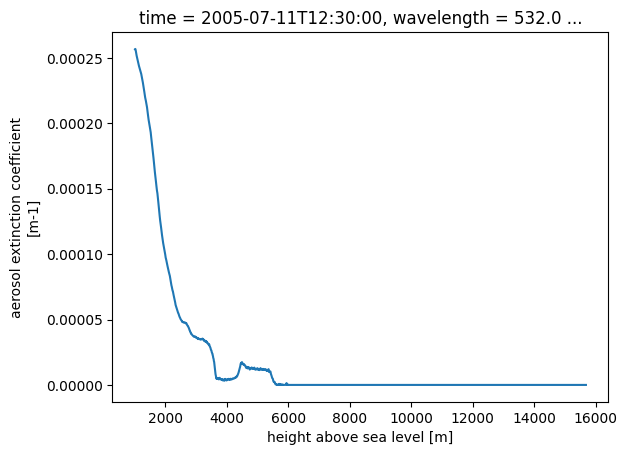

In [9]:
lidar.extinction.plot()

In [24]:


def extract_info(filename):
    # Split the filename based on underscores
    parts = filename.split('.')[0].split("_")
    
    # Extract information from the filename
    info_dict = {
        "station": parts[2],
        "level": int(parts[3][3:]),
        "wavelength": float(parts[4][1:]),  # Removing the 'b' from the wavelength
        "datetime_initial": datetime.strptime(parts[5], "%Y%m%d%H%M"),
        "datetime_end": datetime.strptime(parts[6], "%Y%m%d%H%M"),
        "version": int(parts[7][1:]),  # Removing the 'v' from the version
        "quality_control_code": int(parts[8][2:]),  # Removing the 'qc' from the quality control code
    }    

    return info_dict

def generate_filename(info: dict) -> str:   
    # Extract information from the dictionary
    station = info["station"]
    level_ = info["level"]
    level = f"Lev{level_:02d}"
    wavelength_ = info["wavelength"]
    wavelength = f"b{int(wavelength_):04d}"
    datetime_initial = info["datetime_initial"].strftime("%Y%m%d%H%M")
    datetime_end = info["datetime_end"].strftime("%Y%m%d%H%M")
    version_ = info["version"]
    version = f"v{version_:02d}"
    qa_ = info["quality_control_code"]
    quality_control_code = f"qc{qa_:02d}"
    
    # Generate the filename
    filename = f"EARLINET_AerRemSen_{station}_{level}_{wavelength}_{datetime_initial}_{datetime_end}_{version}_{quality_control_code}.nc"
    
    return filename

In [25]:
info = extract_info(file.name)
filename = generate_filename(info)
filename

'EARLINET_AerRemSen_gra_Lev02_b0532_200507111155_200507111230_v02_qc03.nc'

In [ ]:
for file_ in Path(main_dir).glob('*b532*.nc'):
    info = extract_info(file_.name)
    info_355 = info.copy()
    info_355['wavelength'] = 355
    file355 = Path(file_.parent) / generate_filename(info_355)    
    if file355.exists():
        #Load both files 

        # Merge the two datasets

        # Retrieve angstrom exponent 

        # Filtering 

        # n_dc converter

        # CCN 

        # Save the file
        

In [ ]:
#Find mininum value of extinction from 355 and 532 nm dataset



